# Table of Content

#### 1.Introduction
#### 2.Technologies Used
#### 3. Importing Libraries
#### 4. Data Cleaning 
#### 5. Handling Missing Values
#### 6. Data Analysis
#### 7. Data Visualization
#### 8. Key insights

## Introduction

Housing affordability is a pressing issue in many regions, and the gap between market rents and Local Housing Allowance (LHA) rents can significantly impact individuals and families seeking affordable housing. This analysis aims to investigate the disparity between average market rents and LHA rents for various bed types in a specific area, providing valuable insights into the affordability challenges faced by residents.
      Additionally, it will explore how the affordability gap varies across different bed types, offering a deeper understanding of the specific challenges faced by households with different housing needs.. By examining this gap, we can gain valuable insights into the challenges faced by low-income households in accessing affordable housing and inform potential policy interventions to address this issue.

## Technologies Used

#### This data analysis project leverages the following technologies:

1. Python: As a versatile and powerful programming language, Python is the primary tool used for data manipulation, analysis, and visualization.

2. Pandas: This popular Python library provides efficient data structures and data analysis tools, making it ideal for handling and cleaning large datasets.

3. NumPy: NumPy is another essential Python library for numerical computations and array operations, which are crucial for statistical analysis.

4. Matplotlib: This library is used to create a wide range of static, animated, and interactive visualizations, such as line plots, scatter plots, histograms, and bar charts.

5. Seaborn: Built on top of Matplotlib, Seaborn offers a high-level interface for creating attractive and informative statistical visualizations.

6. Jupyter Notebook: This interactive computing environment provides a flexible platform for combining code, text, and visualizations, making it an excellent tool for data exploration and analysis.

## General Assumptions

1. I have assumed that the data anlaysis only performed on "North West London BRMA" area as there is only one data having  "South West Herts BRMA" as brma_text.
2. I have compared average market rents of "North West London BRMA" and Local Housing Allowance (LHA) rent of "North West London BRMA"



### Importig Required Libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Reading the data from csv file

In [101]:
rent_data = pd.read_csv(r"rent_comparison_dataset.csv")
lha_data = pd.read_csv(r"2024-25_LHA.csv")

# Data Cleaning

In [102]:
rent_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1505 non-null   int64  
 1   post_code         1505 non-null   object 
 2   type              1505 non-null   object 
 3   transaction_type  1500 non-null   object 
 4   bedrooms          1505 non-null   int64  
 5   brma_text         1494 non-null   object 
 6   price             1501 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 82.4+ KB


In [103]:
rent_data['brma_text'].value_counts() #finding the unique values and their frequencies in "brma_text"

North West London BRMA    1493
South West Herts BRMA        1
Name: brma_text, dtype: int64

We can see that there is only one entry having "South West Herts BRMA" as brma_text and all the other values are "North West London BRMA"

In [104]:
rent_data[rent_data['brma_text'] == 'South West Herts BRMA'] 

,id,post_code,type,transaction_type,bedrooms,brma_text,price
1328,6281991,HA5 4AL,Detached,buy,3,South West Herts BRMA,1850000.0


#### Checking minimum values of 'buy' and 'rent'

In [105]:
rent_data.groupby('transaction_type')['price'].min() 

transaction_type
buy       0.0
rent    100.0
Name: price, dtype: float64

#'price' can not be 0.0 in 'buy' transaction type so it is an outlier
#### Filtering Rent Data

In [106]:
rent_df = rent_data[(rent_data['transaction_type'] == 'rent')] 

In [107]:
rent_data[rent_data['transaction_type'].isnull()]

,id,post_code,type,transaction_type,bedrooms,brma_text,price
973,7113370,HA3 6AX,Apartment,NaN,2,North West London BRMA,1650.0
1050,7117754,HA1 1SA,Flat,NaN,2,North West London BRMA,475000.0
1187,6854613,HA7 3BT,End of Terrace,NaN,3,North West London BRMA,2550.0
1297,4849811,HA7 3NE,Maisonette,NaN,1,North West London BRMA,295000.0
1502,4810072,HA2 6DH,Flat,NaN,2,North West London BRMA,425000.0


#### Handling Missing Transaction Types and Prices

The minimum value of 'Price' in the 'transaction_type' for 'buy' DataFrame is 99500, it means that there are no prices in the buy DataFrame that are below 99950. Therefore, all transactions which have 'price' more than 99500 should be classified as 'buy' and all transactions which have 'price' less than 99500 should be classified as 'rent'.

In [108]:
rent = rent_df[rent_df['price'] < 99950]
rent['transaction_type'].fillna('rent',inplace=True)

C:\Users\NITESH\AppData\Local\Temp\ipykernel_18756\3028266605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['transaction_type'].fillna('rent',inplace=True)


In [109]:
buy = rent_data[rent_data['price']>=99950]
buy['transaction_type'].fillna('rent',inplace=True)

C:\Users\NITESH\AppData\Local\Temp\ipykernel_18756\3239663107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy['transaction_type'].fillna('rent',inplace=True)


####  Filling Missing BRMA Values

In [110]:
rent['brma_text'].fillna('North West London BRMA',inplace=True) #his fills any missing values in the brma_text column with 'North West London BRMA'
rent

C:\Users\NITESH\AppData\Local\Temp\ipykernel_18756\384560902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['brma_text'].fillna('North West London BRMA',inplace=True) #his fills any missing values in the brma_text column with 'North West London BRMA'


,id,post_code,type,transaction_type,bedrooms,brma_text,price
1,7239659,HA2 8FL,Flat,rent,1,North West London BRMA,1700.0
2,7253315,HA1 3RA,Flat,rent,1,North West London BRMA,1400.0
3,7253316,HA1 1EH,Apartment,rent,1,North West London BRMA,1680.0
4,7253317,HA1 3NT,Flat,rent,2,North West London BRMA,1800.0
5,7253318,HA1 3DF,House,rent,2,North West London BRMA,1600.0
...,...,...,...,...,...,...,...
1446,6968914,HA1 3PY,Maisonette,rent,2,North West London BRMA,1850.0
1447,6096185,HA1 2XE,Flat,rent,2,North West London BRMA,2100.0
1452,7236638,HA5 3RJ,Ground Flat,rent,1,North West London BRMA,1650.0
1469,5856190,HA2 7JW,Apartment,rent,1,North West London BRMA,1425.0


####  Box Plot for Rent Prices by Number of Bedrooms

Plotting the box plot to see any outliers in the data

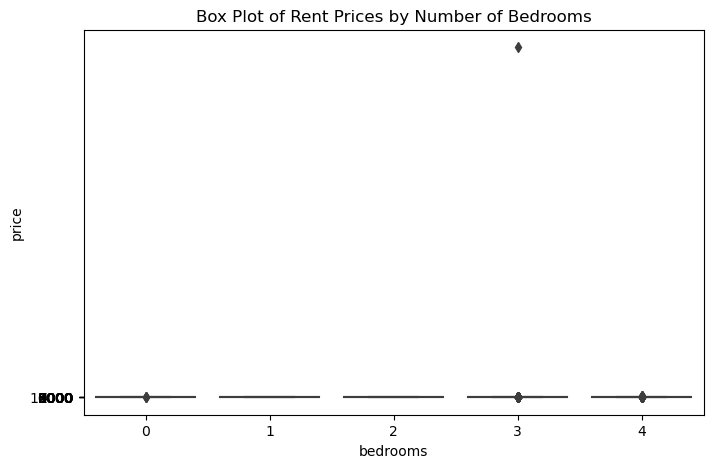

In [111]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='bedrooms', y='price', data=rent_data)
plt.title('Box Plot of Rent Prices by Number of Bedrooms')
plt.yticks([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000])
plt.show()

We can see a oulier in the data having price more than the normal prices

#### Replacing Outliers in Price Data
Replacing outlier and invalid values with the mean of the 'price' in 'rent' transaction_type

In [112]:
rent['price'].replace([np.nan,999999999.0,0.0], rent['price'].mean(), inplace=True) 

C:\Users\NITESH\AppData\Local\Temp\ipykernel_18756\1479994236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['price'].replace([np.nan,999999999.0,0.0], rent['price'].mean(), inplace=True)


In [113]:
rent.isna().sum()

id                  0
post_code           0
type                0
transaction_type    0
bedrooms            0
brma_text           0
price               0
dtype: int64

In [114]:
rent_data.isna().sum()

id                   0
post_code            0
type                 0
transaction_type     5
bedrooms             0
brma_text           11
price                4
dtype: int64

In [115]:
len(rent_df)

369

##### Merging rent and buy DataFrames

In [116]:
rent_data = pd.concat([rent,buy])
rent_data.isna().sum()
rent_data

,id,post_code,type,transaction_type,bedrooms,brma_text,price
1,7239659,HA2 8FL,Flat,rent,1,North West London BRMA,1700.0
2,7253315,HA1 3RA,Flat,rent,1,North West London BRMA,1400.0
3,7253316,HA1 1EH,Apartment,rent,1,North West London BRMA,1680.0
4,7253317,HA1 3NT,Flat,rent,2,North West London BRMA,1800.0
5,7253318,HA1 3DF,House,rent,2,North West London BRMA,1600.0
...,...,...,...,...,...,...,...
1500,4474794,HA1 3RG,Semi-Detached,buy,4,North West London BRMA,875000.0
1501,4726367,HA1 3RR,Flat,buy,1,North West London BRMA,125000.0
1502,4810072,HA2 6DH,Flat,rent,2,North West London BRMA,425000.0
1503,5798080,HA3 5DL,Apartment,buy,3,North West London BRMA,480000.0


## Data Analysis

#### Calculation of average market rent for each bed type

In [117]:
average_market_rent = rent.groupby('bedrooms')['price'].mean().reset_index()

Rename the columns for better clarity

In [118]:
average_market_rent.columns = ['bedrooms', 'avg_market_rent']

Filter the DataFrame to include only properties with 1 to 4 bedrooms.

In [119]:
average_market_rent = average_market_rent[average_market_rent['bedrooms'].isin([1,2,3,4])]

In [120]:
average_market_rent

,bedrooms,avg_market_rent
1,1,1530.644737
2,2,1906.535211
3,3,2575.255556
4,4,3408.428571


#### Dropping Empty Columns in LHA Data

In [121]:
lha_data = lha_data.dropna(how='all', axis='columns')
lha_data

,BRMA,CAT A,CAT B,CAT C,CAT D,CAT E
0,Ashford,90.50,172.60,195.62,252.64,331.40
1,Aylesbury,101.87,184.11,228.99,306.08,379.73
2,Barnsley,72.80,95.51,103.56,126.58,178.36
3,Barrow-in-Furness,91.00,109.32,115.07,146.14,185.84
4,Basingstoke,93.51,179.51,218.63,264.66,322.19
...,...,...,...,...,...,...
147,Worcester North,75.91,118.52,149.59,172.60,228.99
148,Worcester South,88.05,130.95,161.10,189.86,264.66
149,Worthing,102.41,174.90,218.63,271.56,337.15
150,Yeovil,100.11,120.82,159.95,195.62,287.67


#### Renaming LHA Columns

In [122]:
lha_data.rename(columns={'CAT A': '1_bed_shared','CAT B': '1_bed','CAT C': '2_beds','CAT D': '3_beds','CAT E': '4_beds'}, inplace=True)

#### Average lha for each bed type

In [123]:
lha_data[['1_bed_shared','1_bed','2_beds','3_beds','4_beds']].mean()

1_bed_shared     96.819737
1_bed           149.927105
2_beds          184.399539
3_beds          222.885592
4_beds          294.812697
dtype: float64

#### Extracting LHA Data for North West London

In [124]:
north_west_london_data = lha_data[lha_data['BRMA'] == 'North West London']
north_west_london_data

,BRMA,1_bed_shared,1_bed,2_beds,3_beds,4_beds
87,North West London,142.99,253.15,310.68,386.63,483.29


#### Creating a DataFrame for LHA Rent

Creating a DataFrame to store average LHA rents for different bedroom types in North West London.

For 1-bedroom property i took the average of the '1_bed_shared' and '1_bed' column from "north_west_london_data"

In [125]:
north_west_london_rent = pd.DataFrame({
    'bedrooms': [1, 2, 3, 4],
    'avg_lha_rent': [
        (north_west_london_data['1_bed_shared'].values[0] + north_west_london_data['1_bed'].values[0]) / 2,
        north_west_london_data['2_beds'].values[0],
        north_west_london_data['3_beds'].values[0],
        north_west_london_data['4_beds'].values[0]
    ]
})

#### Merging Market Rent with LHA Rent

In [126]:
rent_comparison = pd.merge(average_market_rent, north_west_london_rent , on='bedrooms', how='inner')

#### Calculating Average Market Rent per Bedroom and Percentage Increase over LHA Rent

In [127]:
rent_comparison['avg_by_bed'] = rent_comparison['avg_market_rent']/rent_comparison['bedrooms']
rent_comparison['percentage_inrcrease'] = rent_comparison['avg_market_rent']*100/rent_comparison['avg_lha_rent']
rent_comparison.round(0)

,bedrooms,avg_market_rent,avg_lha_rent,avg_by_bed,percentage_inrcrease
0,1,1531.0,198.0,1531.0,773.0
1,2,1907.0,311.0,953.0,614.0
2,3,2575.0,387.0,858.0,666.0
3,4,3408.0,483.0,852.0,705.0


### Bar Plot for Market Rent vs LHA Rent

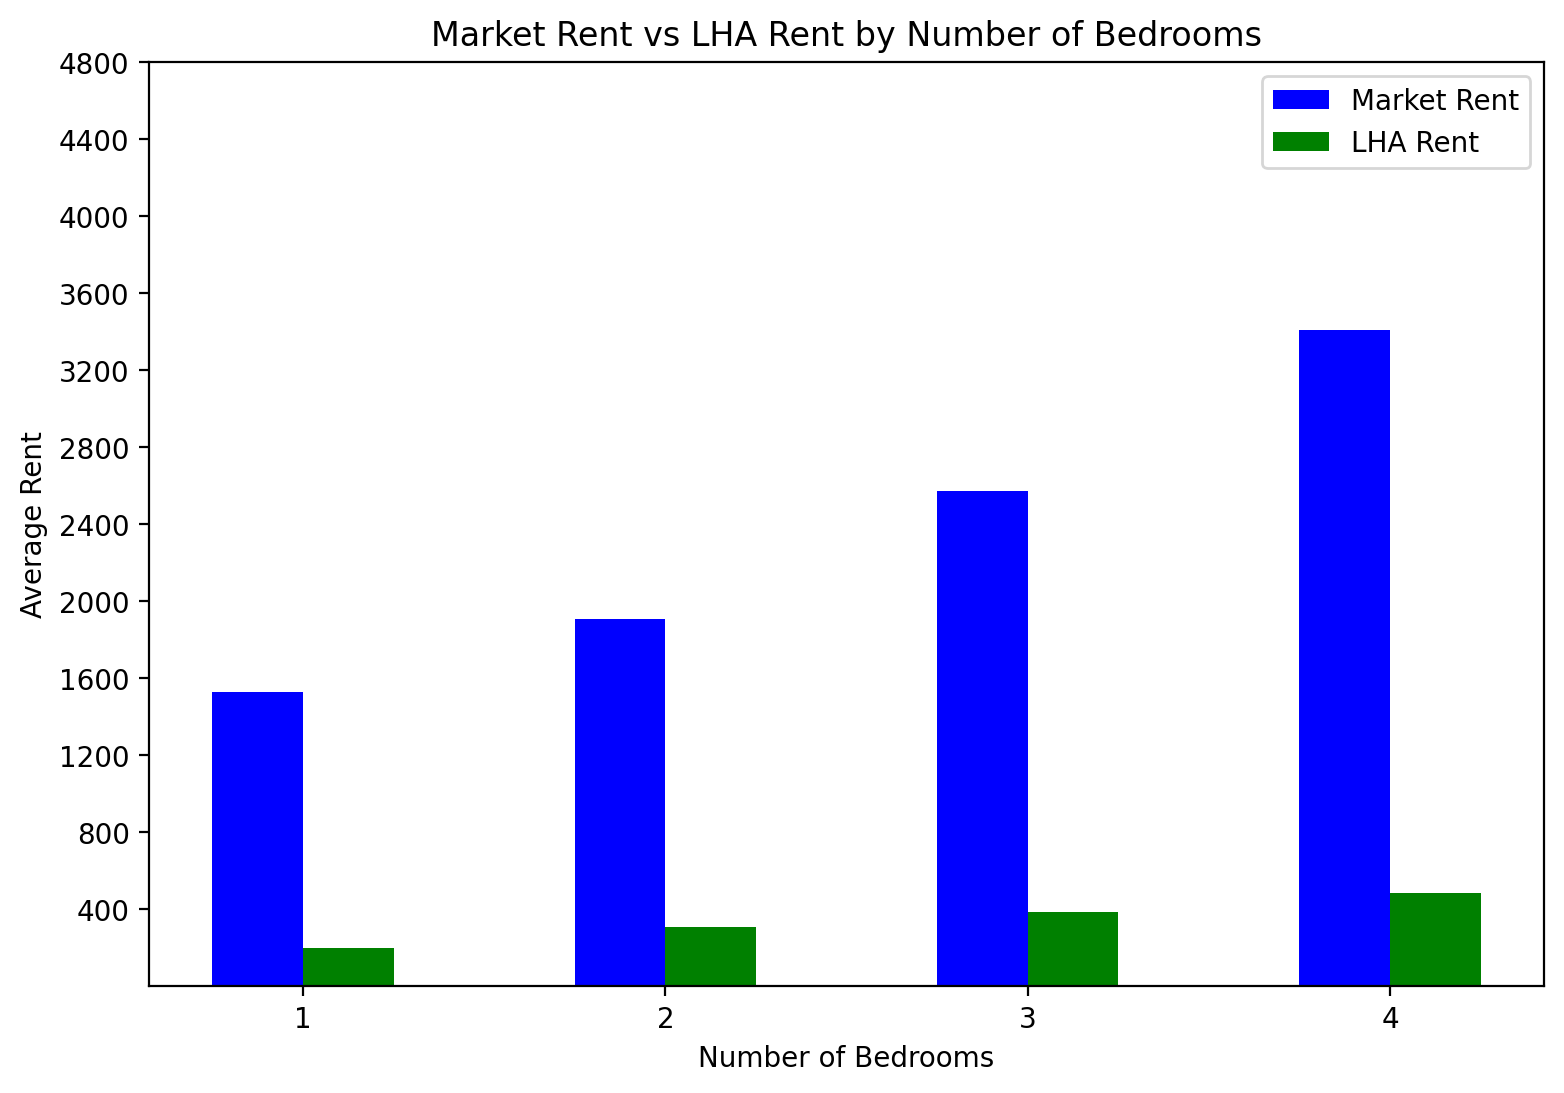

In [128]:
plt.figure(figsize=(9,6),dpi=200)

index = rent_comparison['bedrooms']

# Create bars for market rent and LHA rent
plt.bar(index-bar_width, rent_comparison['avg_market_rent'],width = 0.25, label='Market Rent', color='blue',align = "edge")
plt.bar(index, rent_comparison['avg_lha_rent'],width = 0.25, label='LHA Rent', color='green',align = "edge")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent')
plt.title('Market Rent vs LHA Rent by Number of Bedrooms')
plt.yticks([400,800,1200,1600,2000,2400,2800,3200,3600,4000,4400,4800]) 
plt.xticks([1,2,3,4]) 
plt.legend()
plt.show()

### Scatter Plot for Average Market Rent

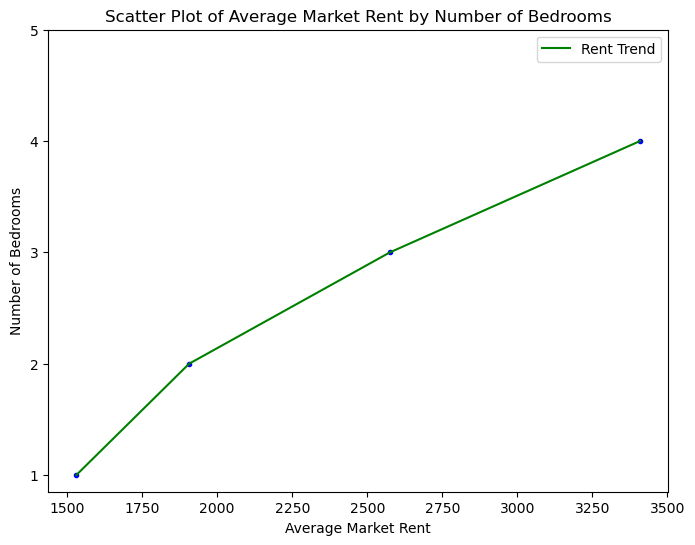

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter( average_market_rent['avg_market_rent'],average_market_rent['bedrooms'], color='blue', marker='.')
plt.plot( average_market_rent['avg_market_rent'],average_market_rent['bedrooms'], color='green', linestyle='-', label='Rent Trend')
plt.ylabel('Number of Bedrooms')
plt.xlabel('Average Market Rent')
plt.title('Scatter Plot of Average Market Rent by Number of Bedrooms')
plt.yticks([1,2,3,4,5])
plt.legend()
plt.show()

### Scatter Plot of Average Market Rent per Bedroom by Number of Bedrooms

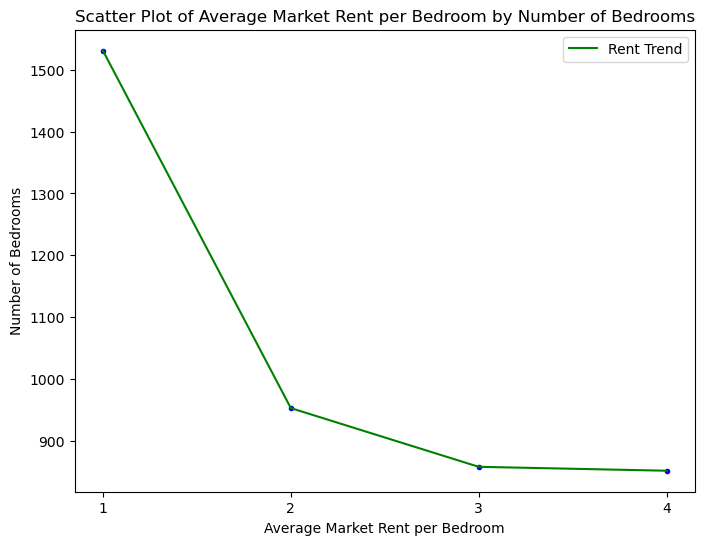

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter( rent_comparison['bedrooms'],rent_comparison['avg_by_bed'], color='blue', marker='.')
plt.plot( rent_comparison['bedrooms'],rent_comparison['avg_by_bed'], color='green', linestyle='-', label='Rent Trend')
plt.ylabel('Number of Bedrooms')
plt.xlabel('Average Market Rent per Bedroom')
plt.title('Scatter Plot of Average Market Rent per Bedroom by Number of Bedrooms')
plt.xticks([1,2,3,4])
plt.legend()

## Key Insights

1. As the number of bedrooms increases, the average market rent rises.This shows a clear trend where larger properties commands higher rent.

2. While LHA rent does increase with more bedrooms, the growth is not as good as market rent.This Suggest a gap between government supported housing assistant and actual market rent rates.

3. The difference between market rent and LHA rent becomes more as the number of bedrooms increases.This shows that it's more difficult for people to afford larger properties using LHA alone.

4. Households with larger families requiring more bedrooms may face affordability challenges as lha does not fully covereed the increasing rent cost.

5. For a 1-bedroom property LHA cover about 13% of the average market rent it increases for 2-bedroom property to 16% but it starts to drop again for 3 and 4 bedroom properties to 15% and 14% respectively.

6. The jump from 1-bedroom to 2-bedroom property is significant but the jump from 3-bedroom to 4-bedroom property is much higher indicating that properties with more bedroom demand much higher rent.



##  Summary of observed Trends

1. Larger properties have lower rent per bedroom
2. The gap between market trend and LHA remains large.
3. Affordability issues are consistant.